## Importing Libraries and Packages

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black


<IPython.core.display.Javascript object>

### Loading the dataset

In [2]:
monet = pd.read_csv("monet.csv")

monet.sample(5)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
349,4.400,51.300,77.800,0,300,1
101,2.422,25.600,31.900,1,81,2
130,0.497,23.700,32.000,1,109,1
68,2.038,21.100,24.200,1,58,1
302,2.530,28.700,36.400,1,257,1


<IPython.core.display.Javascript object>

### EDA

In [3]:
monet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


<IPython.core.display.Javascript object>

In [4]:
monet.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000,430.000,430.000,430.000,430.000,430.000
mean,3.090,27.647,32.111,0.821,182.644,1.612
std,4.311,10.097,10.460,0.384,109.092,0.592
min,0.010,3.900,6.700,0.000,1.000,1.000
25%,0.600,23.125,28.525,1.000,87.250,1.000
50%,1.313,25.600,31.900,1.000,179.500,2.000
75%,3.850,31.450,36.200,1.000,274.750,2.000
max,33.014,78.700,89.000,1.000,387.000,3.000


<IPython.core.display.Javascript object>

- From this summary, one can see that there are indications of outliers in the dataset. For instance, if one looks at the minimum, maximum and mean of the price column, it is evident that the maximum value is an extreme. Similar observations can be made on the hieght column. Visualizations should make that observation clearer.
- Additionally, it seems the house and signed columns might not have many unique variables.

#### Checking for duplicates and null values.

In [5]:
monet.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [6]:
monet.isnull().sum()

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
monet.nunique()

PRICE      363
HEIGHT     132
WIDTH      120
SIGNED       2
PICTURE    376
HOUSE        3
dtype: int64

<IPython.core.display.Javascript object>

- Checking the unique values in the columns for any patterns.

In [8]:
columns =["PRICE", "HEIGHT", "WIDTH", "SIGNED","PICTURE","HOUSE "]

for column in columns:
    print("Unique values in", column, "are:")
    print(monet[column].value_counts())
    print("*"*50)


Unique values in PRICE are:
0.825    4
0.330    4
3.300    3
1.650    3
0.718    3
        ..
4.312    1
7.700    1
1.210    1
1.158    1
1.375    1
Name: PRICE, Length: 363, dtype: int64
**************************************************
Unique values in HEIGHT are:
25.600    41
23.600    37
28.700    26
21.300    16
25.500    16
          ..
17.200     1
32.600     1
16.100     1
44.100     1
17.700     1
Name: HEIGHT, Length: 132, dtype: int64
**************************************************
Unique values in WIDTH are:
36.200    34
31.900    31
39.400    28
28.700    26
32.000    21
          ..
14.400     1
11.600     1
15.100     1
31.800     1
57.100     1
Name: WIDTH, Length: 120, dtype: int64
**************************************************
Unique values in SIGNED are:
1    353
0     77
Name: SIGNED, dtype: int64
**************************************************
Unique values in PICTURE are:
181    4
66     4
5      3
276    3
147    3
      ..
251    1
252    1
253    1
2

<IPython.core.display.Javascript object>

- There are no obvious patterns.

### Univariate Analysis

- To understand the dataset better.

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### i) Observation on Price.

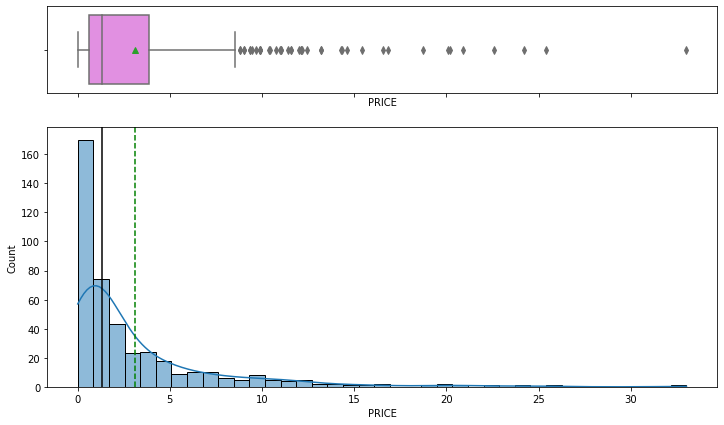

<IPython.core.display.Javascript object>

In [10]:
histogram_boxplot(monet, "PRICE")

- The column is skewed to the right. This is an indication of outliers in the upper limit.

#### ii) Observation on Height

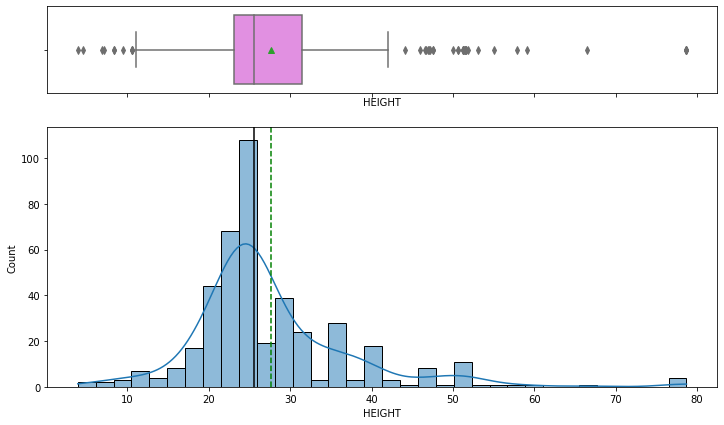

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(monet, "HEIGHT")

- There are outliers on both the upper and lower limits. The column is skewed to the right too.

#### iii) Observations on Width

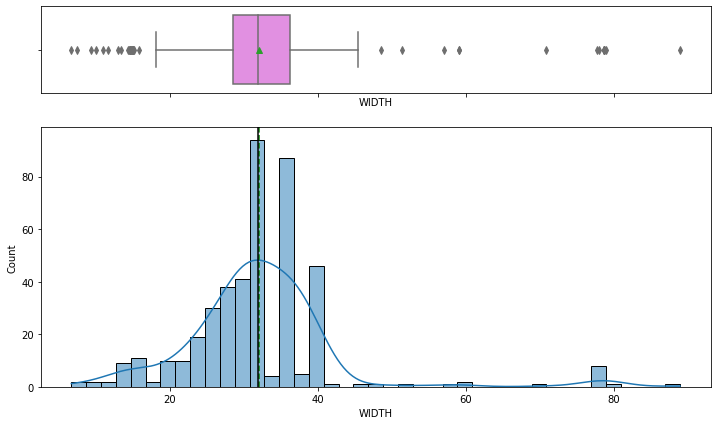

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(monet, "WIDTH")

- This column too has similar characteristics as the previous one.

#### Observations on Picture

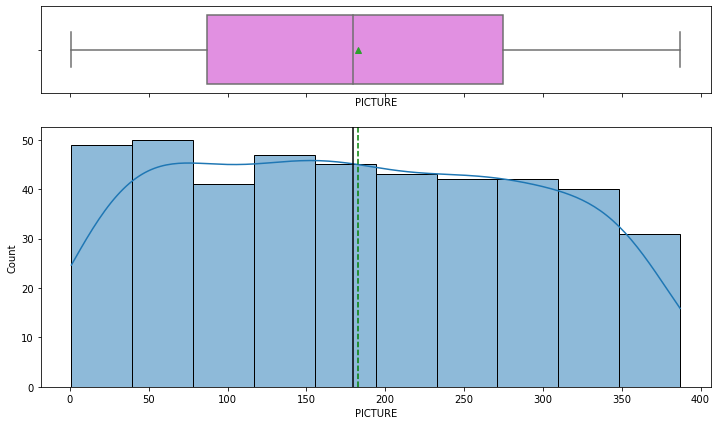

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(monet, "PICTURE")

- There is no clear distribution pattern.

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### iv) Observation on Signed

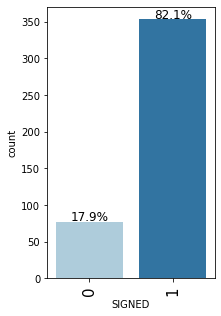

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(monet, "SIGNED")

- 82.1% of the clients have signed.

#### v) Observations on House

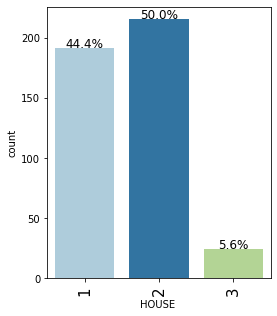

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(monet, "HOUSE ")

- Majority of the clients have either 2 or 1 house at 50 % and 44.4 % respectively.

In [17]:
monet.columns

Index(['PRICE', 'HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE '], dtype='object')

<IPython.core.display.Javascript object>

### Bivariate Analysis

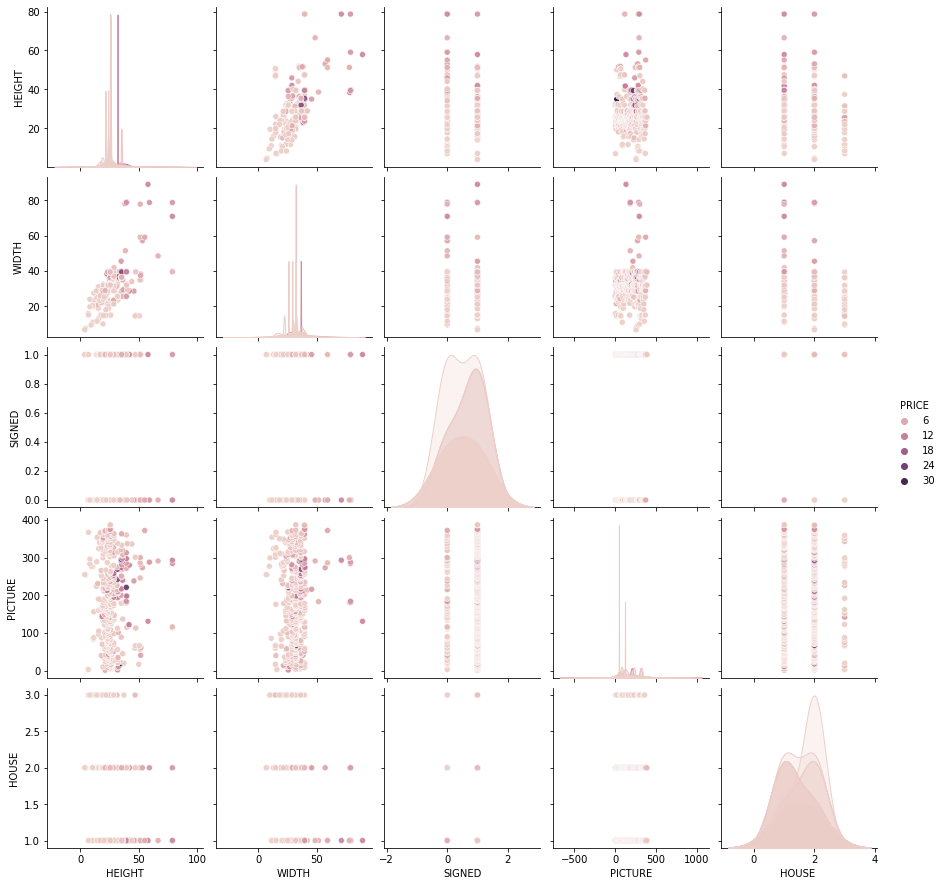

<IPython.core.display.Javascript object>

In [18]:
sns.pairplot(monet, hue="PRICE")

- Apart from height and width, no correlation patterns is observed in the data. The figure can be backed up by the heatmap below.

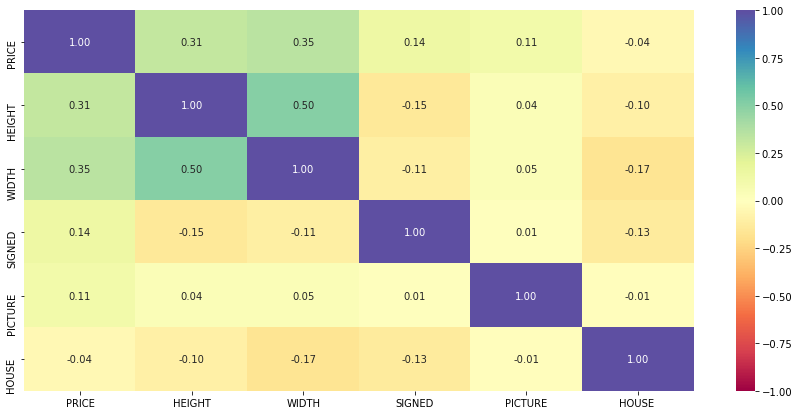

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(monet.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Height and width have a relatively moderate positive correlation.
- Those two variables further have a weak positive correlation with the price.

# Things to consider for further analysis:
- outlier treatment
- Log transformation

#### Data Preparation for Modeling

In [20]:
import statsmodels.api as sm

<IPython.core.display.Javascript object>

In [21]:
X = monet.drop(["PRICE"], axis=1)
y = monet["PRICE"]
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [22]:
X.head()

,const,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,1.000,21.300,25.600,1,1,1
1,1.000,31.900,25.600,1,2,2
2,1.000,6.900,15.900,0,3,3
3,1.000,25.700,32.000,1,4,2
4,1.000,25.700,32.000,1,4,2


<IPython.core.display.Javascript object>

In [23]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1
)
print(X_train.shape, X_val.shape, X_test.shape)

(258, 6) (86, 6) (86, 6)


<IPython.core.display.Javascript object>

In [24]:
linear_regression = sm.OLS(y_train, X_train)
lin_regm = linear_regression.fit()

print(lin_regm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     12.72
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           4.96e-11
Time:                        14:50:07   Log-Likelihood:                -700.60
No. Observations:                 258   AIC:                             1413.
Df Residuals:                     252   BIC:                             1435.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6610      1.338     -4.233      0.0

<IPython.core.display.Javascript object>

- Negative values in the coefficient column may indicate the price decreases with an increase in the corresponding attribute value. Positive values indicate that an increase in the price corresponds with an increase in the corresponding attribute value.
- This analysis works with a significance level of 0.05. Therefore, under the p-value column, any variable with a p-value less than 0.05 is considered to be significant.
- However, as the model summary warns, the variables might contain multicollinearity, which affects the p-value. This issue has to be dealt with, in addition to checking whether the assumptions of the linear regression have been met.

In [25]:
import math
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)  # To check model performance


# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perform(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )


<IPython.core.display.Javascript object>

- The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics.

#### Fitting the model with the training data.

In [26]:
linreg1 = LinearRegression()
linreg1.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [27]:
model_perform(linreg1, X_train, y_train)

,MAE,MAPE,RMSE,R^2
0,2.185,299.633,3.657,0.202


<IPython.core.display.Javascript object>

In [28]:
model_perform(linreg1, X_val, y_val)

,MAE,MAPE,RMSE,R^2
0,2.899,402.090,3.884,0.150


<IPython.core.display.Javascript object>

In [29]:
linreg1.score(X_train, y_train)

0.20151071945899057

<IPython.core.display.Javascript object>

- The training and validation R-Squared scores are ~20% and ~15%, meaning they are incomparable. This is an indication that the model is a not a good fit.
- The R-Squared on the validation set is 0.150... that means that the model explains ~15% of the total variation in the test dataset. This indicates that the model is unsatisfactory.
- The validation set MAPE suggests that one can predict within 402.09% of the price.
- The MAE indicates that the current model is able to predict price within a mean error of 2.899

In [30]:
y_pred1 = linreg1.predict(X_test).flatten()

X_test = np.arange(0, len(X_test), 1)

<IPython.core.display.Javascript object>

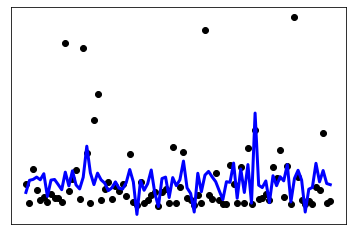

<IPython.core.display.Javascript object>

In [31]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred1, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Checking Linear Regression Assumptions
The assumptions are:-

- No multicollinearity
- Mean of residuals should be 0
- No heteroscedasticity
- Linearity of variables
- Normality of error terms.

#### Testing for multicollinearity

**Multicollinearity** occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multicollinearity. One such way is by using Variation Inflation Factor.

- Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  𝛽𝑘  is "inflated" by the existence of correlation among the predictor variables in the model.

- General Rule of thumb: If VIF is 1 then there is no correlation among the  𝑘 th predictor and the remaining predictor variables, and hence, the variance of  𝛽𝑘  is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity, and if it is 10 or exceeding 10, it shows signs of high multicollinearity.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const     35.735
HEIGHT     1.356
WIDTH      1.373
SIGNED     1.049
PICTURE    1.003
HOUSE      1.055
dtype: float64



<IPython.core.display.Javascript object>

- The VIF results show that the variance of the **price** and the other variables is not inflated. Therefore, there is no multicollinearity
The earlier model summary revealed that one of the variables, **picture** is not statistically insignificant. That variable will therefore be dropped to see how the model performs. All the other variables are significant (house is almost approaching significance).

In [33]:
X_train2 = X_train.drop(["PICTURE"], axis=1)
linregm22 = sm.OLS(y_train, X_train2)
linreg2 = linregm22.fit()

print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     15.93
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.21e-11
Time:                        14:50:07   Log-Likelihood:                -700.66
No. Observations:                 258   AIC:                             1411.
Df Residuals:                     253   BIC:                             1429.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5700      1.305     -4.269      0.0

<IPython.core.display.Javascript object>

In [34]:
linearregression2 = LinearRegression()
linearregression2.fit(X_train2, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [35]:
model_perform(linearregression2, X_train2, y_train)

,MAE,MAPE,RMSE,R^2
0,2.192,305.466,3.658,0.201


<IPython.core.display.Javascript object>

- Dropping **picture** got rid of multicollinearity, but the model performance is still poor.There is no drastic change in the scores.

**Checking mean of residuals**

In [36]:
residual = linreg2.resid

np.mean(residual)

-2.709288435286816e-15

<IPython.core.display.Javascript object>

- The mean is very close to 0. The model satisfies the assumption.

#### Assumption 3: Linearity of varibles
Why the test?

- Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

How to check linearity?

- Make a plot of fitted values vs residuals, if they don't follow any pattern, they we say the model is linear, otherwise model is showing signs of non-linearity.

How to fix if this assumption is not followed?

- We can try to transform the variables and make the relationships linear.

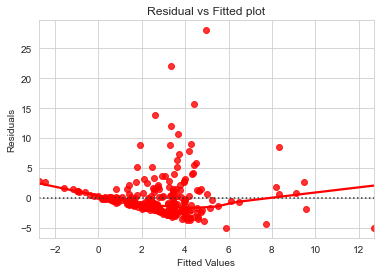

<IPython.core.display.Javascript object>

In [37]:
# residuals are already defined.
fitted = linreg2.fittedvalues  # aka predicted values
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="red", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

We see no pattern in the plot above. Hence, the assumption is satisfied.

#### Assumption 4: Test for normality
What is the test?

- Error terms/Residuals should be normally distributed

- If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

What do non-normality indicate?

- It suggests that there are a few unusual data points which must be studied closely to make a better model.

How to Check the Normality?

- It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

Other test to check for normality : Shapiro-Wilk test.

What if the residuals are not-normal?

- We can apply transformations like log, exponential, arcsinh, etc. as per our data.

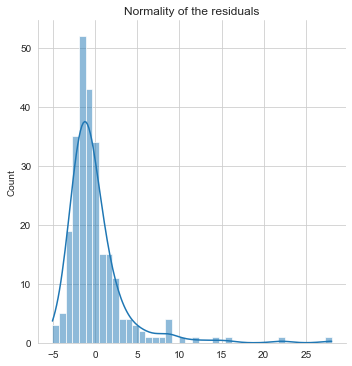

<IPython.core.display.Javascript object>

In [38]:
sns.displot(residual, kde=True)
plt.title("Normality of the residuals")
plt.show()

- The residuals are not normally distributed. The following QQ plot can illustrate it further.

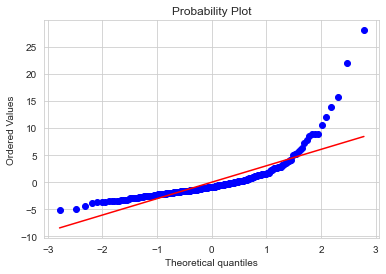

<IPython.core.display.Javascript object>

In [39]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

- In a further analysis, it might be necessary to do log transformation on the data to check the performance of the model. 
- It is important to note that the observed behavior of the variables could be attributed to outliers in the data. Further analysis can handle the outliers to check model performance.

- Despite the models poor performance, some interpretations can still be made.
- Majority of the variables of are statistically significant. (House is approaching significance.) Additionally, there is a positive correlation among the variables. As an illustration, an increase in **Width** corresponds to ~-.12 increase in the price of the monet.

#### Model Performance with Feature Engineering.

1. Outlier Treatment

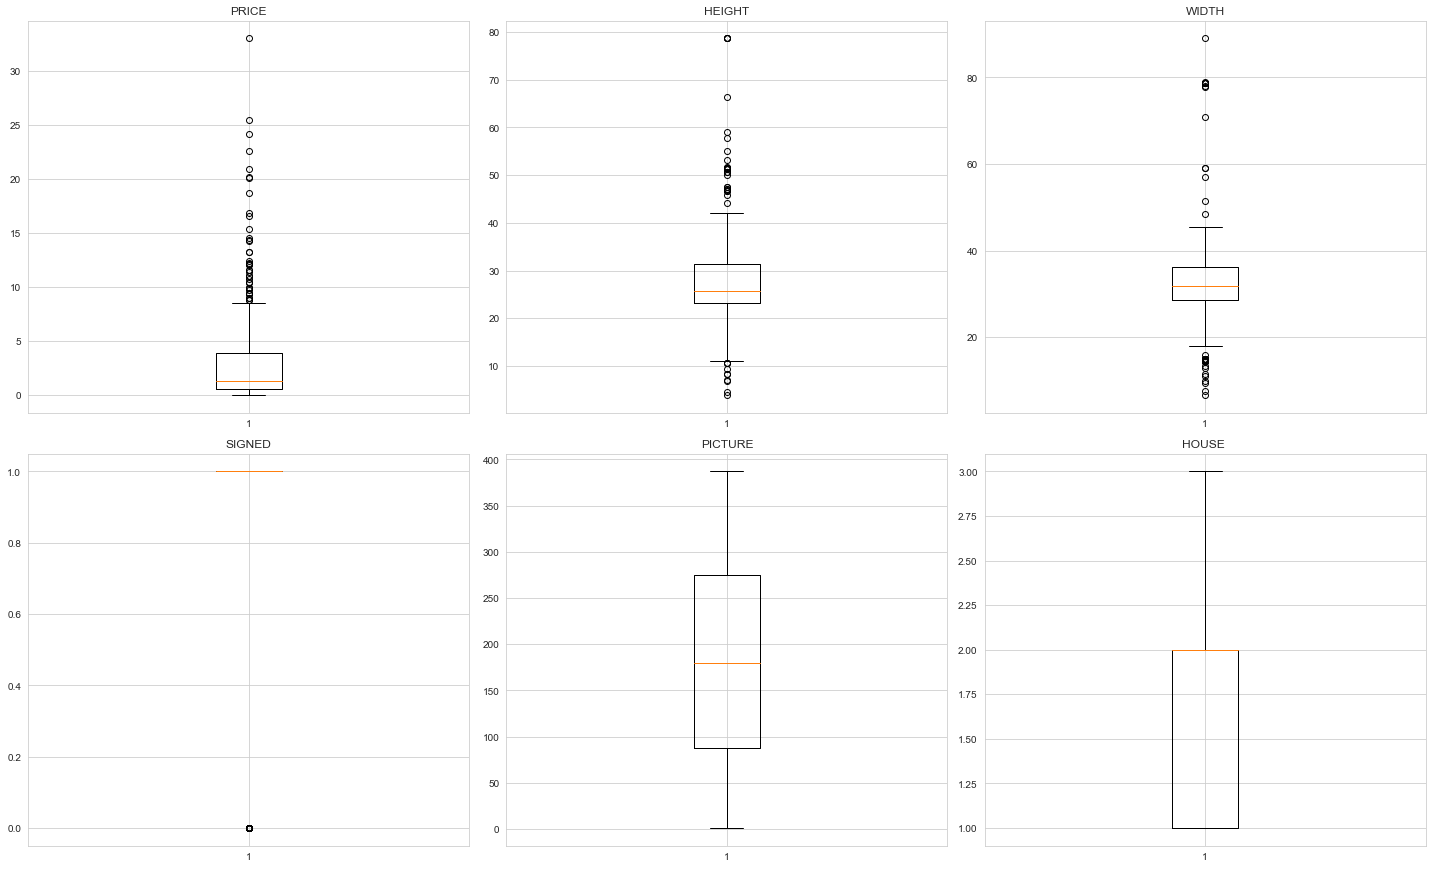

<IPython.core.display.Javascript object>

In [40]:
# let's plot the boxplots of all columns to check for outliers
numeric_columns = monet.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(monet[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Like previous analysis showed, there are outliers in the data. Those will be removed in the subsequent section.

In [41]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

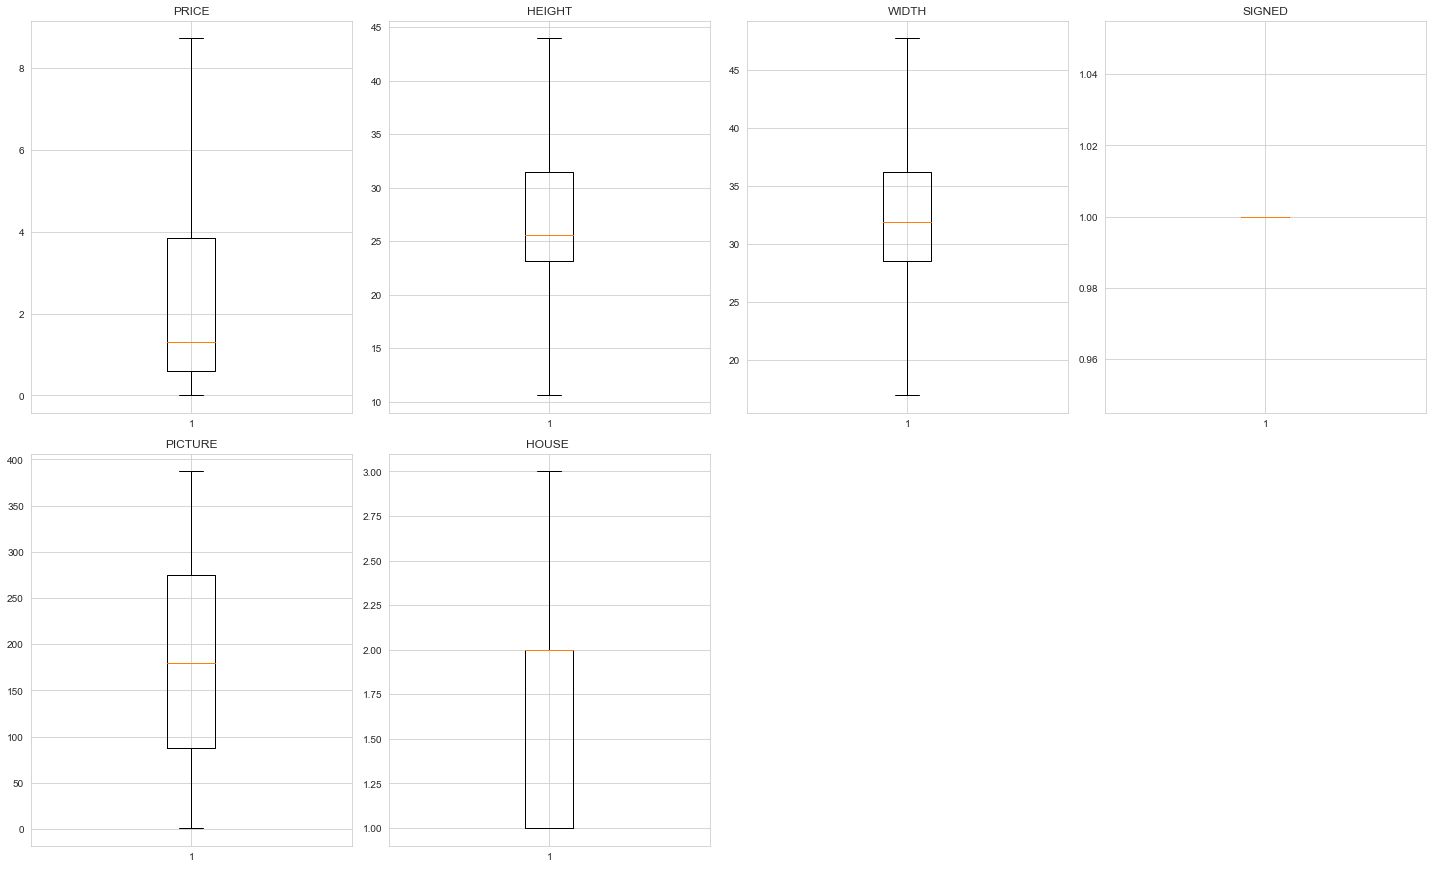

<IPython.core.display.Javascript object>

In [42]:
df = treat_outliers_all(monet, numeric_columns)

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

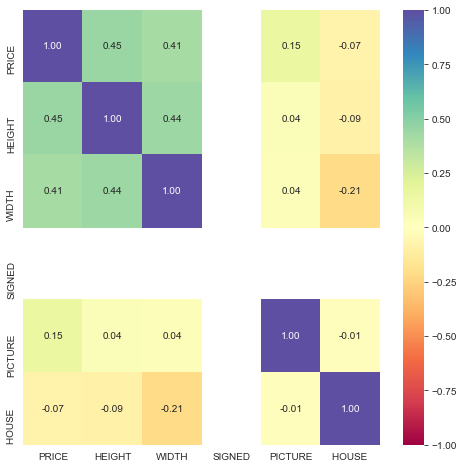

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(8, 8))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

- The same 3 variables from the earlier observation have moderate positive correlation with each other.

In [44]:
df.SIGNED.value_counts()

1    430
Name: SIGNED, dtype: int64

<IPython.core.display.Javascript object>

- Now we can check whether the earlier observed skewness has changed.

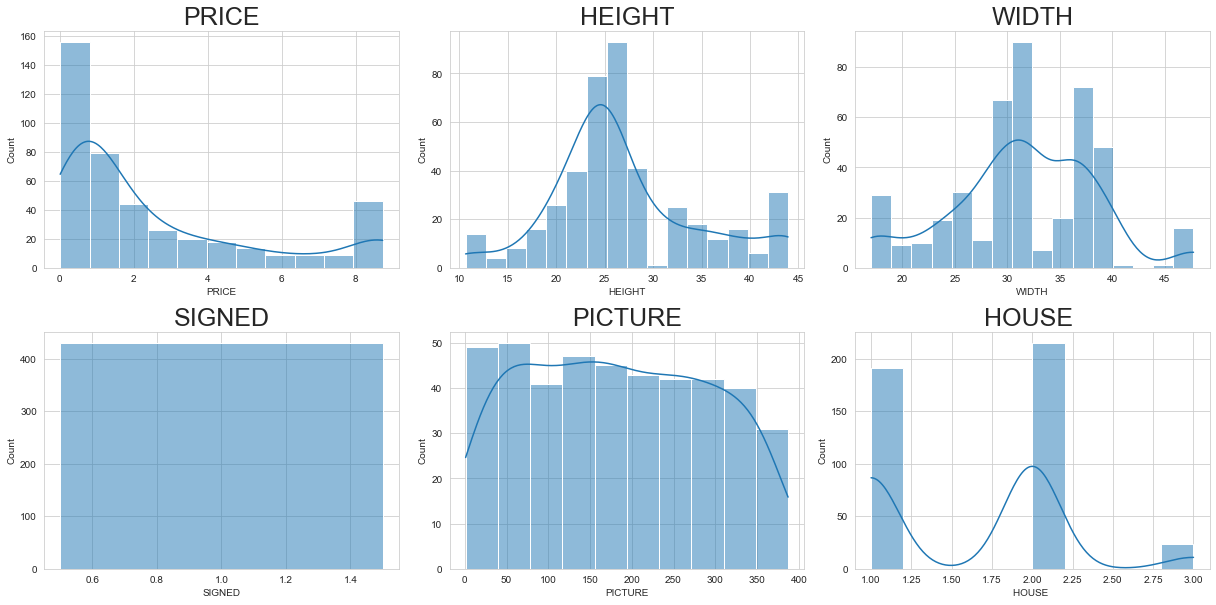

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(17, 75))

for i in range(len(numeric_columns)):
    plt.subplot(18, 3, i + 1)
    sns.histplot(df[numeric_columns[i]], kde=True)
    plt.tight_layout()
    plt.title(numeric_columns[i], fontsize=25)

plt.show()

There is still skewness. Next we can try log transformations on the columns.

#### Log Transformation.

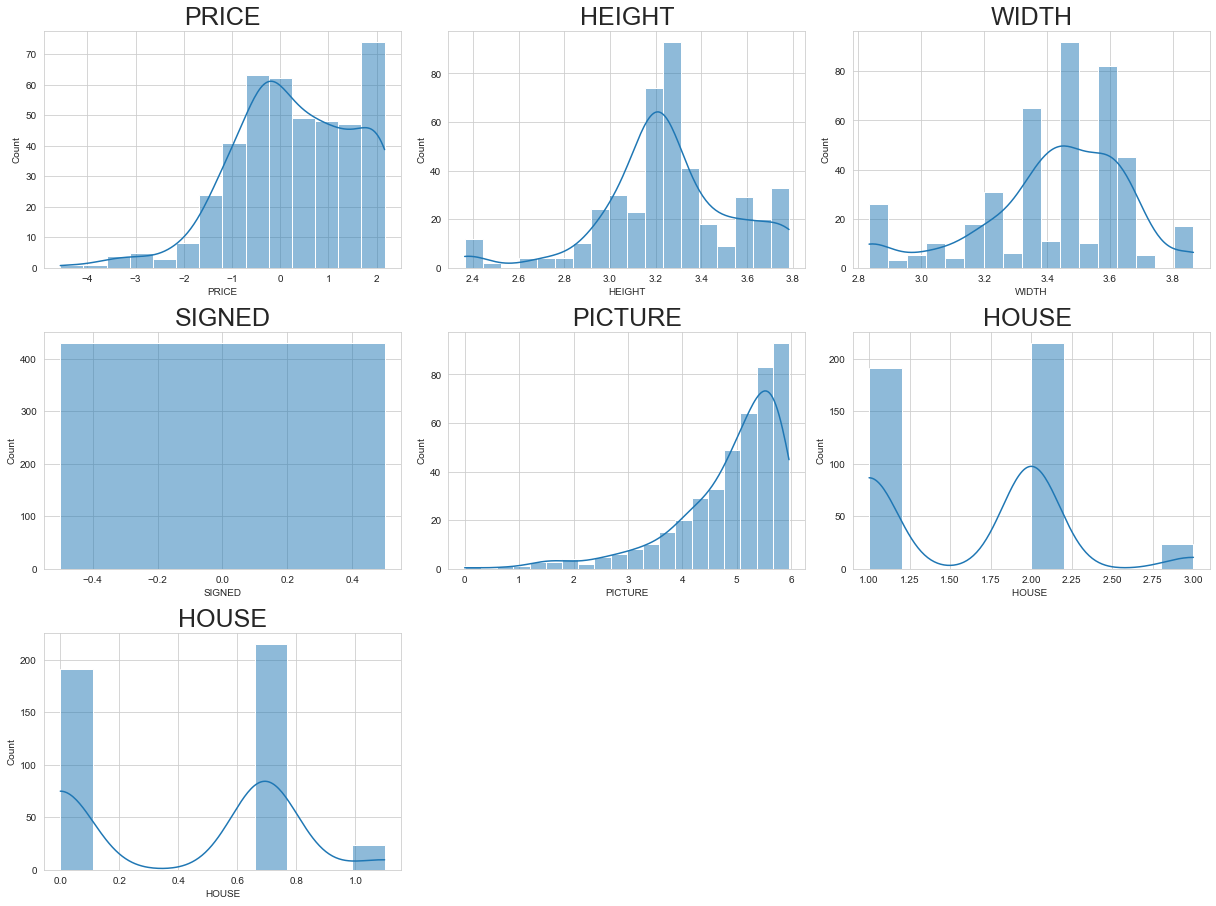

<IPython.core.display.Javascript object>

In [46]:
df["PRICE"] = np.log(df["PRICE"])
df["SIGNED"] = np.log(df["SIGNED"])
df["PICTURE"] = np.log(df["PICTURE"])
df["HOUSE"] = np.log(df["HOUSE "])
df["HEIGHT"] = np.log(df["HEIGHT"])
df["WIDTH"] = np.log(df["WIDTH"])

all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    sns.histplot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

Log transformation did not get rid of the skewness.
The data will be left as is with regard to skewness.

In [47]:
df.sample(5)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,HOUSE
246,0.928,3.463,3.258,0.000,5.333,2,0.693
4,0.397,3.246,3.466,0.000,1.386,2,0.693
361,0.766,3.250,3.600,0.000,5.743,2,0.693
388,1.136,3.250,3.469,0.000,5.826,2,0.693
383,0.256,3.567,3.589,0.000,5.808,2,0.693


<IPython.core.display.Javascript object>

In [48]:
y2 = df["PRICE"]
X2 = df.drop(["PRICE"], axis=1)


X_temp2, X_test2, Y_temp2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=1
)

X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_temp2, Y_temp2, test_size=0.25, random_state=1
)
print(X_train2.shape, X_val2.shape, X_test2.shape)

(258, 6) (86, 6) (86, 6)


<IPython.core.display.Javascript object>

The following code structure is adapted from sklearn's example here https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html 

Coefficients: 
 [ 1.44834598e+00  1.53186303e+00  9.32587341e-15  2.23419165e-02
 -3.30523470e+00  5.02115255e+00]
Mean squared error: 2.15
Coefficient of determination: -0.43


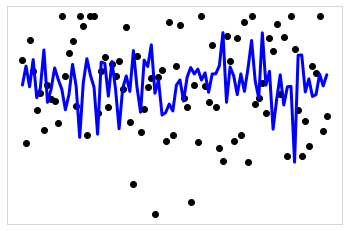

<IPython.core.display.Javascript object>

In [49]:
# Create instance of linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train2, y_train2)

# Make predictions using the validation set
y_pred = regr.predict(X_val2)

# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test2, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test2, y_pred))

X_test2 = np.arange(0, len(X_test2), 1)

# Plot outputs
plt.scatter(X_test2, y_test2, color="black")
plt.plot(X_test2, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [50]:
X_test2.shape

(86,)

<IPython.core.display.Javascript object>

In [51]:
linear_regression = sm.OLS(y_train2, X_train2)
lin_regm = linear_regression.fit()

print(lin_regm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.414
Model:                            OLS   Adj. R-squared (uncentered):              0.402
Method:                 Least Squares   F-statistic:                              35.72
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                    1.33e-27
Time:                        14:50:33   Log-Likelihood:                         -367.56
No. Observations:                 258   AIC:                                      745.1
Df Residuals:                     253   BIC:                                      762.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<IPython.core.display.Javascript object>

### Simple Regression Models

In [52]:
Xs = monet["SIGNED"]
y = monet["PRICE"]
Xs = sm.add_constant(Xs)


# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp3, X_test3, y_temp3, y_test3 = train_test_split(
    Xs, y, test_size=0.2, random_state=1
)

# then we split the temporary set into train and validation

X_train3, X_val3, y_train3, y_val3 = train_test_split(
    X_temp3, y_temp3, test_size=0.25, random_state=1
)
print(X_train3.shape, X_val3.shape, X_test3.shape)

linear_regression3 = sm.OLS(y_train3, X_train3)
lin_regm3 = linear_regression3.fit()

print(lin_regm3.summary())

(258, 2) (86, 2) (86, 2)
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                nan
Time:                        14:50:33   Log-Likelihood:                -431.42
No. Observations:                 258   AIC:                             864.8
Df Residuals:                     257   BIC:                             868.4
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2573      

<IPython.core.display.Javascript object>

In [53]:
linreg3 = LinearRegression()
linreg3.fit(X_train3, y_train3)

LinearRegression()

<IPython.core.display.Javascript object>

Coefficients: 
 [0. 0.]
Mean squared error: 1.51
Coefficient of determination: -0.00


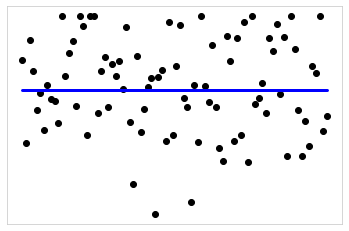

<IPython.core.display.Javascript object>

In [55]:
# Make predictions using the validation set
y_pred3 = linreg3.predict(X_val3)

# The coefficients
print("Coefficients: \n", linreg3.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test3, y_pred3))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test3, y_pred3))

X_test3 = np.arange(0, len(X_test3), 1)

# Plot outputs
plt.scatter(X_test3, y_test3, color="black")
plt.plot(X_test3, y_pred3, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


- Whether the painting is signed or not is not a good predictor of the price of the painting. The scores are very low.

In [56]:
Xs2 = monet["HEIGHT"]
y = monet["PRICE"]
Xs2 = sm.add_constant(Xs2)


# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp4, X_test4, y_temp4, y_test4 = train_test_split(
    Xs2, y, test_size=0.2, random_state=1
)

# then we split the temporary set into train and validation

X_train4, X_val4, y_train4, y_val4 = train_test_split(
    X_temp4, y_temp4, test_size=0.25, random_state=1
)
print(X_train4.shape, X_val4.shape, X_test4.shape)

linear_regression3 = sm.OLS(y_train4, X_train4)
lin_regm4 = linear_regression3.fit()

print(lin_regm4.summary())

(258, 2) (86, 2) (86, 2)
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     128.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.05e-24
Time:                        14:53:11   Log-Likelihood:                -378.93
No. Observations:                 258   AIC:                             761.9
Df Residuals:                     256   BIC:                             769.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7588      

<IPython.core.display.Javascript object>

Coefficients: 
 [0.         2.48158182]
Mean squared error: 2.02
Coefficient of determination: -0.35


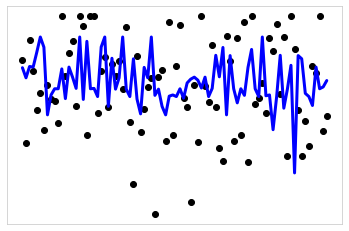

<IPython.core.display.Javascript object>

In [57]:
linreg4 = LinearRegression()
linreg4.fit(X_train4, y_train4)

# Make predictions using the validation set
y_pred4 = linreg4.predict(X_val4)

# The coefficients
print("Coefficients: \n", linreg4.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test4, y_pred4))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test4, y_pred4))

X_test4 = np.arange(0, len(X_test4), 1)

# Plot outputs
plt.scatter(X_test4, y_test4, color="black")
plt.plot(X_test4, y_pred4, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

- height of the painting performs better than the presence of a signature on a painting. However, the model's performance is still very poor as was evident on the multivariate linear regression model.

## **************************************************************************************##